In [2]:
import sys
work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer


run_id,step,lr,epoch,train_loss,train_acc,val_loss,val_acc
i32,list[i64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64]
6,"[1, 2, … 10]","[0.005, 0.004878, … 0.000122]","[1, 2, … 10]","[0.342281, 0.312265, … 0.273509]","[0.211253, 0.28616, … 0.397413]","[0.328204, 0.300651, … 0.261057]","[0.2576, 0.3149, … 0.4248]"
7,"[1, 2, … 10]","[0.005, 0.004878, … 0.000122]","[1, 2, … 10]","[0.317388, 0.279801, … 0.224005]","[0.280933, 0.373413, … 0.513333]","[0.286068, 0.270731, … 0.207505]","[0.348, 0.3887, … 0.5496]"


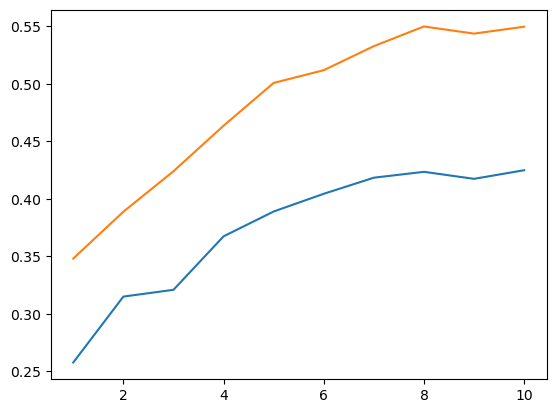

In [15]:
import polars as pl
import matplotlib.pyplot as plt

rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ee/exp_tmp")
rv.write_stats()

# df = rv.fetch_stats()
df = rv.fetch_metrics()
df_agg = df.group_by(by="run_id", maintain_order=True).agg(pl.all())

df_agg = df_agg.filter((pl.col("run_id") > 5) & (pl.col("run_id") < 8))

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)

for df_row in df_agg.iter_rows(named=True):
    ax[0][0].plot(df_row["step"], df_row["val_acc"])

display(df_agg)


